In [2]:
import matplotlib.pyplot as plt
import datetime
import os
import json
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)
import numpy as np
from main_pygod import get_data_from_loader, load_dataset, make_loader, create_model, train_model, test_model
import warnings

In [3]:
def create_metrics():
    return {"overall": {"roc_auc": [], "accuracy": [],"f1": [], "precision": [], "recall": []},
            "licit": {"precision": [], "recall": [],"f1-score": []}, 
           "illicit":{"precision": [], "recall": [],"f1-score": []}}

def hyperparameter_loop(group_para, parameter, parameter_list, metrics):
    """
    Run a grid search for a hyperparameter
    Args: hyperparameter, hyperparameter list, classification metrics (empty dict)
    Returns: Classification metrics dictionary
    """ 
    warnings.filterwarnings('ignore')
    for i in range(len(parameter_list)):
        config[group_para][parameter] = parameter_list[i]
        dataset, input_nodes = load_dataset(mask="train",use_aggregated=config["data"]["use_aggregated"],use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes)
        train_data = get_data_from_loader(loader)

        mymodel = create_model(config=config["model"])

        trained_model = train_model(mymodel, train_data)
    
        dataset, input_nodes = load_dataset(mask="test",use_aggregated=config["data"]["use_aggregated"],
        use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes,)    
        test_data = get_data_from_loader(loader)

        test_metrics = test_model(model=trained_model, data=test_data, output_directory=config["training"]["save_dir"])

        for key in list(test_metrics.keys())[0:-1]:
            metrics["overall"][key].append(test_metrics[key])
        output = test_metrics["classification_report"]
        for key in list(output["0"].keys())[0:-1]:
            metrics["licit"][key].append(output["0"][key])
            metrics["illicit"][key].append(output["1"][key])
        
    return metrics

def plot_metrics(metrics, para_list, parameter, x_log = False):
    """
    Plot the classification metrics
    Args:classification metrics
    Returns:None
    """ 

    size = (8,3)
    plt.figure(figsize= size)
    for key in list(metrics["overall"]):
        plt.plot(para_list, metrics["overall"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Total Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Overall Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["licit"]):
        plt.plot(para_list, metrics["licit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Licit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Licit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["illicit"]):
        plt.plot(para_list, metrics["illicit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Illicit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Illicit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

## DOMINANT using hybrid GCN/GAT backbone

In [4]:
config = {
        "model": {
            "hid_dim": 128,
            "num_layers": 4,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "hybrid",
            "lr": 0.005,
            "epoch": 10,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": True,
            "use_temporal": False,
            "batch_size": 2048*4
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [5]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [2, 3, 4, 5, 6,7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15712, 165], edge_index=[2, 15722], y=[15712])
creating model with {'hid_dim': 128, 'num_layers': 2, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x7f79f6c8ed40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 938.1758 | 
Epoch 0001: Loss 672.4862 | 
Epoch 0002: Loss 447.7534 | 
Epoch 0003: Loss 380.3261 | 
Epoch 0004: Loss 261.7837 | 
Epoch 0005: Loss 179.4628 | 
Epoch 0006: Loss 157.8979 | 
Epoch 0007: Loss 141.1259 | 
Epoch 0008: Loss 142.9573 | 
Epoch 0009: Loss 127.1960 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13204, 165], edge_index=[2, 12130], y=[13204])
testing model...
Test: Loss 21.3229 | 
ROC AUC: 0.4422
Classification Report:
  

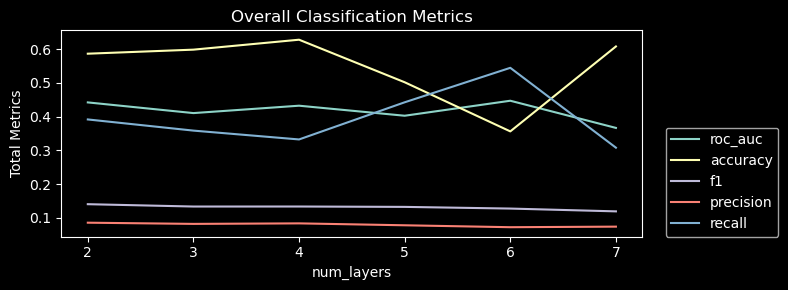

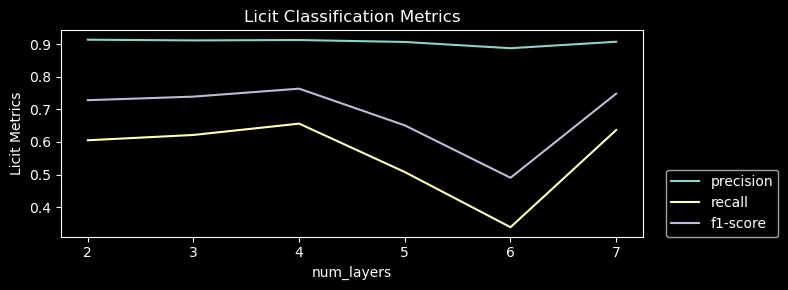

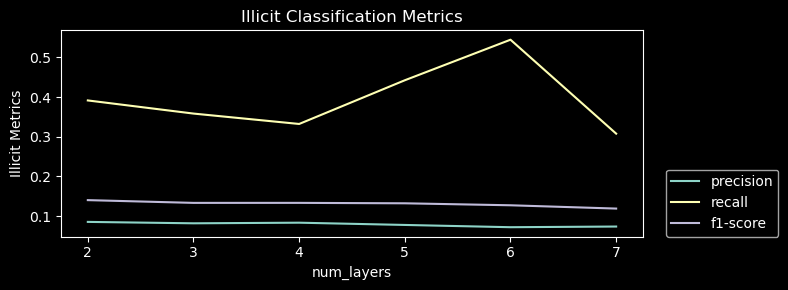

In [6]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [7]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [64, 128, 256]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15698, 165], edge_index=[2, 15713], y=[15698])
creating model with {'hid_dim': 64, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x7f79f6c8ed40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 407.4707 | 
Epoch 0001: Loss 252.9824 | 
Epoch 0002: Loss 161.2390 | 
Epoch 0003: Loss 127.9723 | 
Epoch 0004: Loss 118.9846 | 
Epoch 0005: Loss 99.6691 | 
Epoch 0006: Loss 131.2088 | 
Epoch 0007: Loss 108.3300 | 
Epoch 0008: Loss 88.6652 | 
Epoch 0009: Loss 65.8637 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13196, 165], edge_index=[2, 12115], y=[13196])
testing model...
Test: Loss 11.8010 | 
ROC AUC: 0.2764
Classification Report:
      

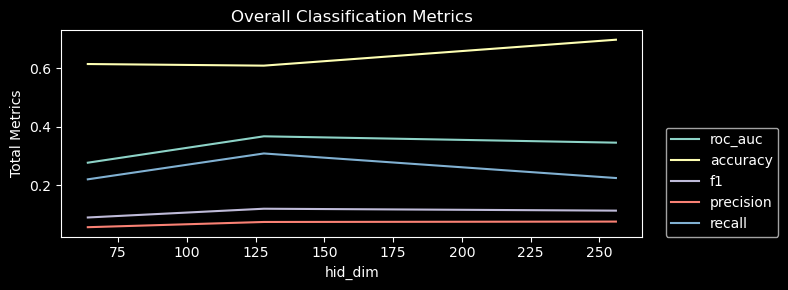

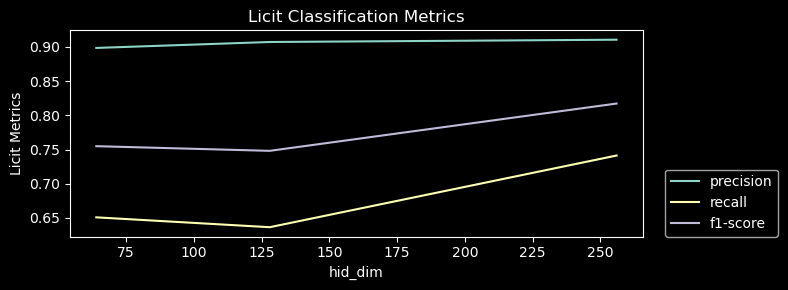

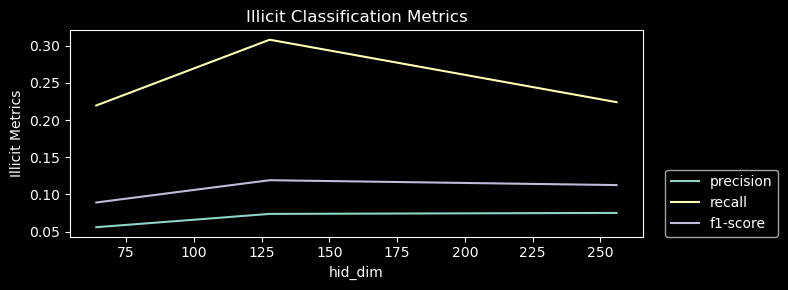

In [8]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [9]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.0, 0.1, 0.2, 0.3]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15698, 165], edge_index=[2, 15713], y=[15698])
creating model with {'hid_dim': 256, 'num_layers': 7, 'dropout': 0.0, 'weight_decay': 0.0, 'act': <function relu at 0x7f79f6c8ed40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 2287.9858 | 
Epoch 0001: Loss 1240.7802 | 
Epoch 0002: Loss 927.5030 | 
Epoch 0003: Loss 712.3084 | 
Epoch 0004: Loss 479.3128 | 
Epoch 0005: Loss 414.2686 | 
Epoch 0006: Loss 472.7356 | 
Epoch 0007: Loss 401.2114 | 
Epoch 0008: Loss 341.3514 | 
Epoch 0009: Loss 262.5151 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13196, 165], edge_index=[2, 12105], y=[13196])
testing model...
Test: Loss 34.5218 | 
ROC AUC: 0.3653
Classification Report:


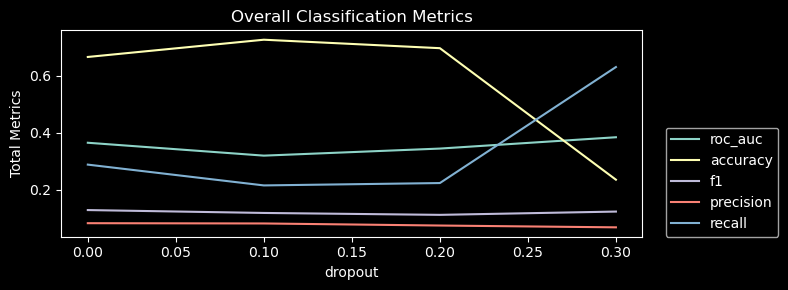

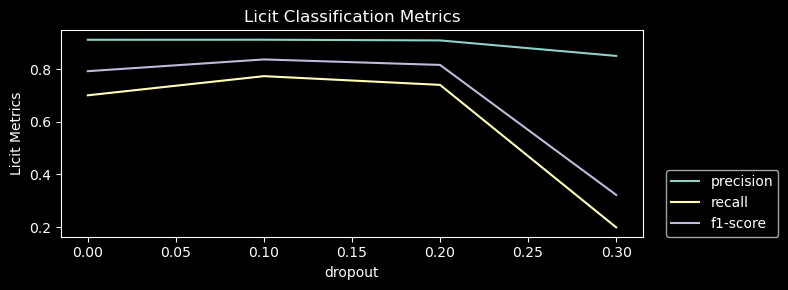

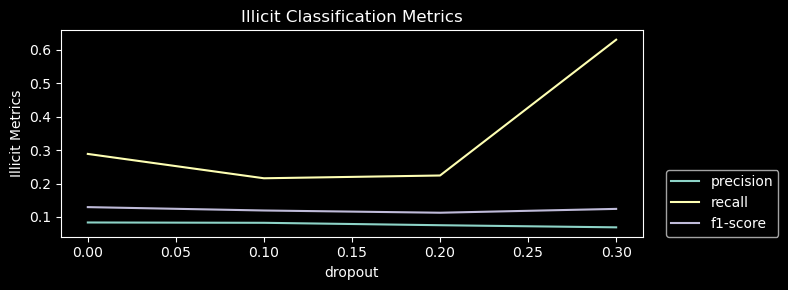

In [10]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [11]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [5,10,15,20]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15698, 165], edge_index=[2, 15713], y=[15698])
creating model with {'hid_dim': 256, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x7f79f6c8ed40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 5, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 1350.4633 | 
Epoch 0001: Loss 585.9899 | 
Epoch 0002: Loss 568.4153 | 
Epoch 0003: Loss 531.4586 | 
Epoch 0004: Loss 372.3985 | 
Epoch 0005: Loss 302.0236 | 
Epoch 0006: Loss 311.5735 | 
Epoch 0007: Loss 337.7596 | 
Epoch 0008: Loss 319.4312 | 
Epoch 0009: Loss 229.9869 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13159, 165], edge_index=[2, 12085], y=[13159])
testing model...
Test: Loss 41.7639 | 
ROC AUC: 0.3480
Classification Report:
  

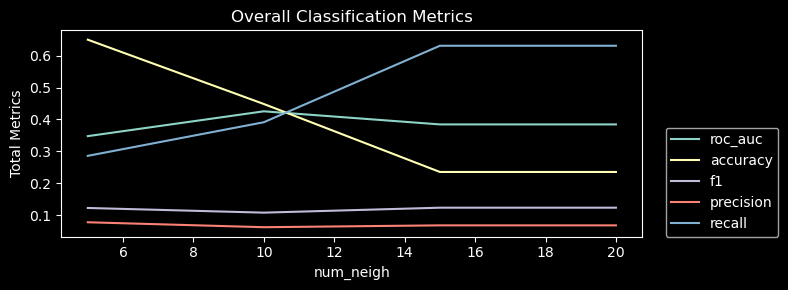

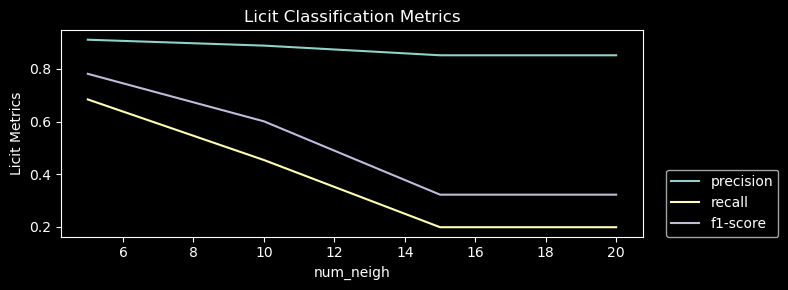

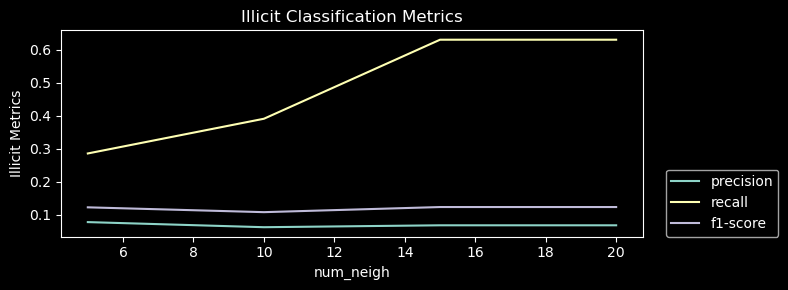

In [12]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [14]:
metrics = create_metrics()
para_change = "epoch"
para_list = [10, 20 , 30]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15706, 165], edge_index=[2, 15692], y=[15706])
creating model with {'hid_dim': 256, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x7f79f6c8ed40>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 20, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.HybridGCNGATBackbone'>}
training model...
Epoch 0000: Loss 1651.3160 | 
Epoch 0001: Loss 924.8903 | 
Epoch 0002: Loss 589.0214 | 
Epoch 0003: Loss 441.5546 | 
Epoch 0004: Loss 409.9637 | 
Epoch 0005: Loss 445.9325 | 
Epoch 0006: Loss 284.5252 | 
Epoch 0007: Loss 420.9933 | 
Epoch 0008: Loss 282.8648 | 
Epoch 0009: Loss 258.0316 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13199, 165], edge_index=[2, 12099], y=[13199])
testing model...
Test: Loss 35.8836 | 
ROC AUC: 0.3749
Classification Report:
 

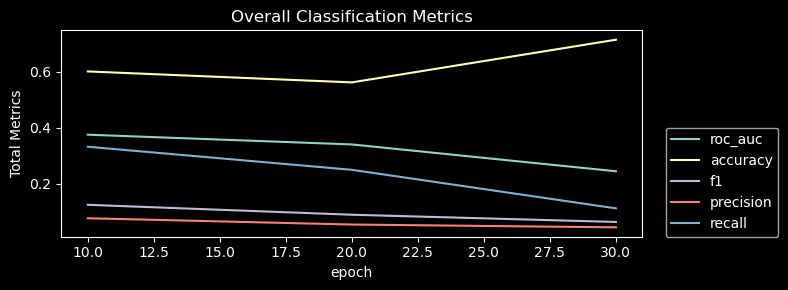

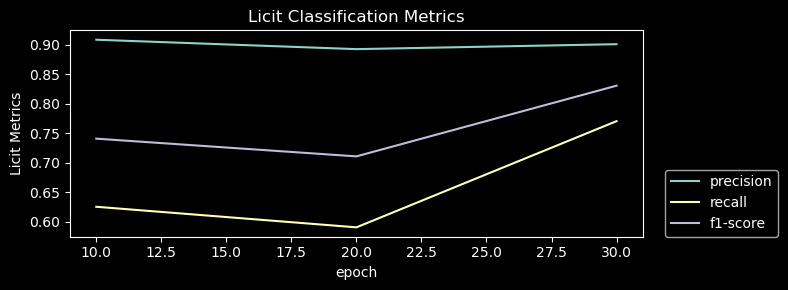

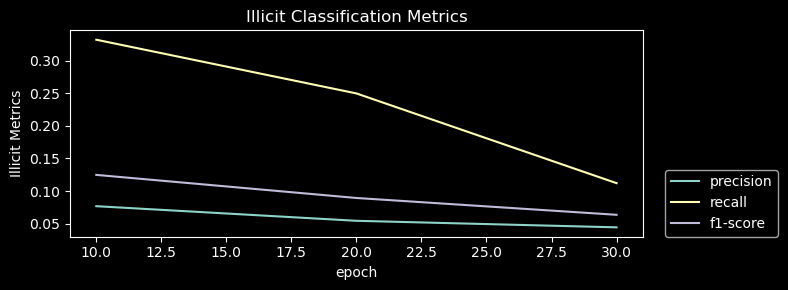

In [15]:
plot_metrics(metrics, para_list, para_change, x_log=False)